In [102]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSets/UberabaRealStates.csv')

In [105]:
df = df.rename(columns={
    "tipo": "type",
    "bairro": "neighborhood",
    "area_lote": "lot_area_m2",
    "area_interna": "internal_area_m2",
    "salas": "rooms",
    "suites": "suites",
    "quartos": "bedrooms",
    "vagas": "parking_spaces",
    "preco": "price_brl",
    "link": "link",
    "imagens": "images"
})

In [106]:
print("Dataset dimension:", df.shape)
print("\nData types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nDescriptive statistics of numerical columns:")
print(df[["lot_area_m2","internal_area_m2","rooms","suites","bedrooms","parking_spaces","price_brl"]].describe())

print("\nTop 10 neighborhoods with the most properties:")
print(df["neighborhood"].value_counts().head(10))

print("\nDistribution by property type:")
print(df["type"].value_counts())


Dataset dimension: (576, 10)

Data types:
id                    int64
type                 object
neighborhood         object
lot_area_m2         float64
internal_area_m2    float64
rooms                 int64
suites                int64
bedrooms              int64
parking_spaces        int64
price_brl           float64
dtype: object

Missing values per column:
id                  0
type                0
neighborhood        0
lot_area_m2         0
internal_area_m2    0
rooms               0
suites              0
bedrooms            0
parking_spaces      0
price_brl           1
dtype: int64

Descriptive statistics of numerical columns:
       lot_area_m2  internal_area_m2       rooms      suites    bedrooms  \
count   576.000000        576.000000  576.000000  576.000000  576.000000   
mean    328.401528        136.350399    0.970486    1.256944    1.979167   
std     380.958294        160.237053    0.964138    1.364119    1.640652   
min       0.000000          0.000000    0.000000    0

In [107]:
# Create a mapping dictionary
type_mapping = {
    "casa": "house",
    "casas": "house",
    "sobrado": "house",
    "apartamento": "apartment",
    "apartameto": "apartment",
    "cobertura": "apartment",
    "duplex": "apartment",
    "terreno": "land",
    "terrenos": "land",
    "lote": "land",
    "loteamento": "land",
    # everything else unclear will be 'other'
}

# Apply the mapping and fill unmapped values as 'other'
df["type_clean"] = df["type"].map(type_mapping).fillna("other")
df["type"]=df["type_clean"]
df = df.drop(columns=["type_clean"])
# Check distribution after cleaning
print(df["type"].value_counts())


type
house        224
land         199
apartment    137
other         16
Name: count, dtype: int64


In [108]:
# Converting to CSV
import csv

file_name = "imoveis_uberaba.csv"

# Get the column names to use as fieldnames
field_names = df.columns.tolist()

with open(file_name, mode="w", newline="", encoding="utf-8") as f:
    writer = csv.DictWriter(
        f,
        fieldnames=field_names
    )
    writer.writeheader()
    # Convert DataFrame rows to a list of dictionaries for DictWriter
    writer.writerows(df.to_dict(orient='records'))

print("CSV generation succeeded!")


CSV generation succeeded!


In [109]:
# Run this if you want to download the .csv file
from google.colab import files
files.download("imoveis_uberaba.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-143833412.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="type", order=df["type"].value_counts().index, palette="pastel")


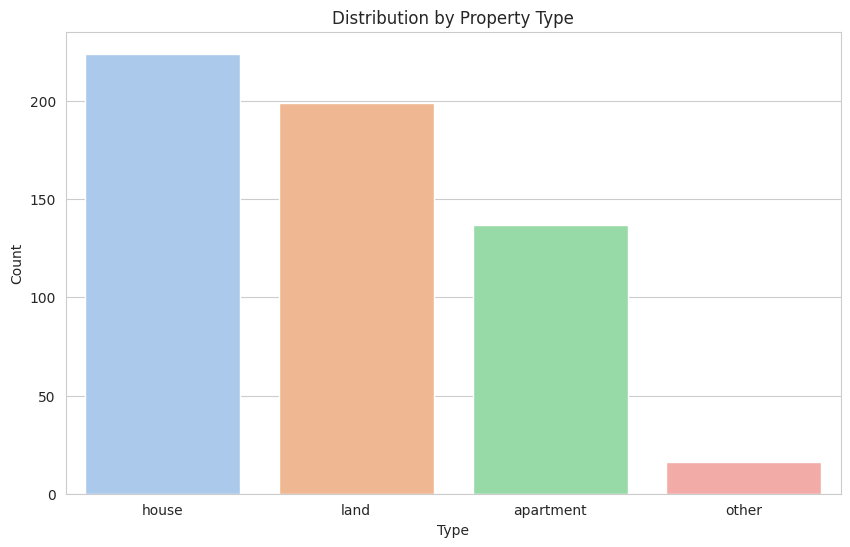

In [111]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

#Distribution by property type
plt.figure()
sns.countplot(data=df, x="type", order=df["type"].value_counts().index, palette="pastel")
plt.title("Distribution by Property Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


/tmp/ipython-input-3304460677.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="type", y="price_brl", palette="muted")


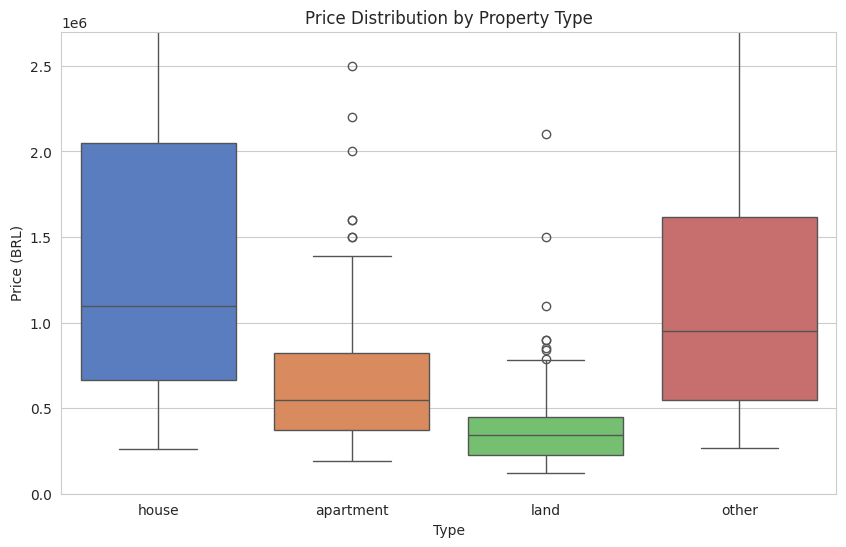

In [112]:
#Price Distribution by Property Type
plt.figure()
sns.boxplot(data=df, x="type", y="price_brl", palette="muted")
plt.title("Price Distribution by Property Type")
plt.xlabel("Type")
plt.ylabel("Price (BRL)")
plt.ylim(0, df["price_brl"].quantile(0.95))  # Limit extreme outliers
plt.show()


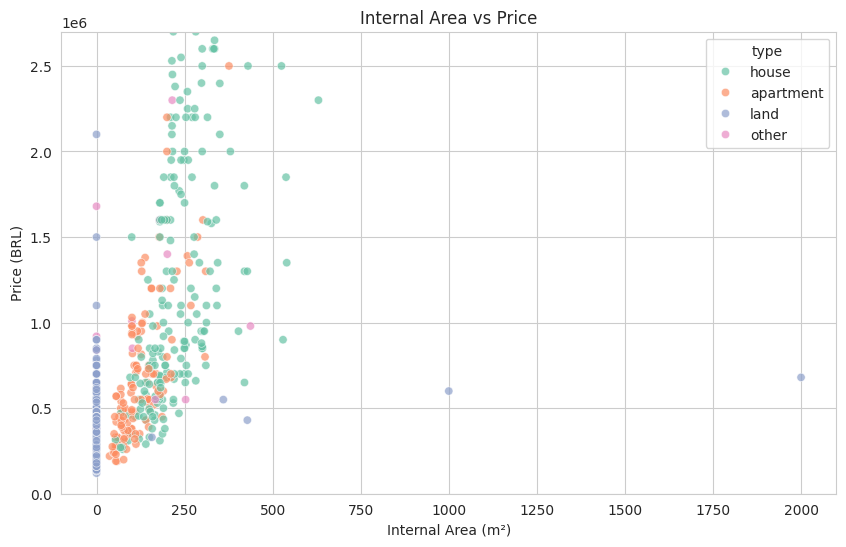

In [113]:
# 3️⃣ Internal area vs price (scatter plot)
plt.figure()
sns.scatterplot(data=df, x="internal_area_m2", y="price_brl", hue="type", palette="Set2", alpha=0.7)
plt.title("Internal Area vs Price")
plt.xlabel("Internal Area (m²)")
plt.ylabel("Price (BRL)")
plt.ylim(0, df["price_brl"].quantile(0.95))  # Limit extreme outliers
plt.show()


/tmp/ipython-input-217996210.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neighborhoods.values, y=top_neighborhoods.index, palette="coolwarm")


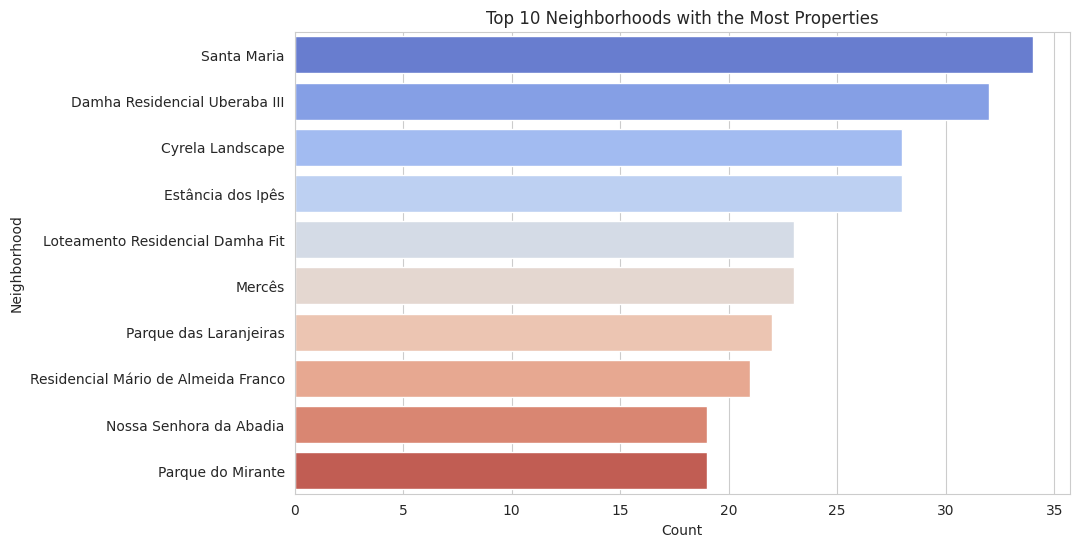

In [114]:
#Distribution of neighborhoods with the most properties
top_neighborhoods = df["neighborhood"].value_counts().head(10)
plt.figure()
sns.barplot(x=top_neighborhoods.values, y=top_neighborhoods.index, palette="coolwarm")
plt.title("Top 10 Neighborhoods with the Most Properties")
plt.xlabel("Count")
plt.ylabel("Neighborhood")
plt.show()


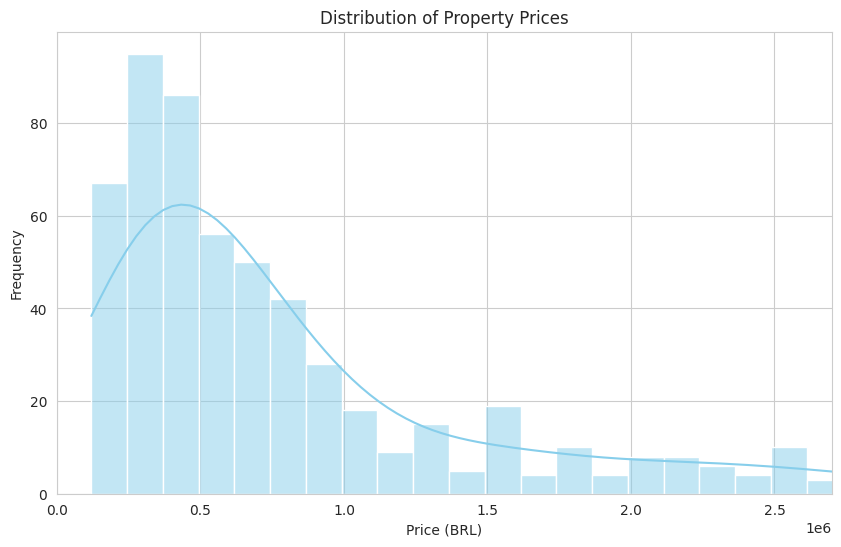

In [115]:
#Price histograms
plt.figure()
sns.histplot(df["price_brl"], bins=50, kde=True, color="skyblue")
plt.title("Distribution of Property Prices")
plt.xlabel("Price (BRL)")
plt.ylabel("Frequency")
plt.xlim(0, df["price_brl"].quantile(0.95))
plt.show()


In [116]:
df.head()

,id,type,neighborhood,lot_area_m2,internal_area_m2,rooms,suites,bedrooms,parking_spaces,price_brl
0,1,house,Damha Residencial Uberaba III,360.00,284.74,1,3,3,4,2950000.0
1,2,house,Damha Residencial Uberaba III,362.91,281.81,1,3,3,4,2700000.0
2,3,house,Residencial Mário de Almeida Franco,1880.00,778.00,2,5,7,10,5400000.0
3,4,house,Damha Residencial Uberaba II,461.00,340.00,2,4,4,4,6350000.0
4,5,house,Condomínio Terra Nova,143.00,140.00,1,1,3,3,580000.0
